In [19]:
# model
import tensorflow as tf
from tensorflow impot keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense

IMG_SHAPE = 70

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 1)), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(2, activation='softmax') 
    
    ])


In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 68, 68, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 128)        

# Import Dataset

In [22]:
#while loading the dataset:
import pickle 

pickle_in = open("train_img.pickle", "rb")
train_img = pickle.load(pickle_in)

pickle_in = open("train_labels.pickle", "rb")
train_labels = pickle.load(pickle_in)

In [23]:
#while loading the dataset:
pickle_in = open("test_img.pickle", "rb")
test_img = pickle.load(pickle_in)

pickle_in = open("test_labels.pickle", "rb")
test_labels = pickle.load(pickle_in)

In [18]:
print(train_labels.shape)

(812, 2)


In [34]:
model.fit(train_img, train_labels, epochs = 5)

Train on 812 samples
Epoch 1/5
812/812 [==============================] - 5s 6ms/sample - loss: 0.0464 - accuracy: 0.9828
Epoch 2/5
812/812 [==============================] - 5s 6ms/sample - loss: 0.0565 - accuracy: 0.9840
Epoch 3/5
812/812 [==============================] - 5s 6ms/sample - loss: 0.0490 - accuracy: 0.9877
Epoch 4/5
812/812 [==============================] - 5s 6ms/sample - loss: 0.0302 - accuracy: 0.9889
Epoch 5/5
812/812 [==============================] - 5s 6ms/sample - loss: 0.0440 - accuracy: 0.9877


In [35]:
model.save('C:/Users/Yogesh/CupDetector/CupNBoxDetection.h5')

In [29]:
#Predicting
import cv2
import tensorflow as tf

def prepare(filepath):
    IMG_SIZE = 70  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict(prepare("C:/Users/Yogesh/CupDetector/Cup/cup3.jpg"))

print(prediction)

[[1.0000000e+00 1.1996391e-10]]


In [30]:
import cv2
import tensorflow as tf

def prepare(filepath):
    IMG_SIZE = 70  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict(prepare("C:/Users/Yogesh/CupDetector/Others/obj9.jpg"))

print(prediction)

[[1.000000e+00 5.312974e-13]]


In [36]:
test_loss, test_acc = model.evaluate(test_img, test_labels)
print("Test loss: {0} - Test Accuracy: {1}".format(test_loss, test_acc))

812/812 [==============================] - 2s 3ms/sample - loss: 0.0125 - accuracy: 0.9938
Test loss: 0.012495300875348154 - Test Accuracy: 0.993842363357544


# Prediction

In [37]:
predictions = model.predict(x=test_img, batch_size =10000, verbose = 0)
for i in predictions:
    print(i)

[1.9558367e-08 1.0000000e+00]
[1.0000000e+00 1.4217855e-15]
[2.9551908e-18 1.0000000e+00]
[1.000000e+00 1.370606e-10]
[9.9999940e-01 5.3853125e-07]
[5.895703e-14 1.000000e+00]
[5.895703e-14 1.000000e+00]
[0.0896336 0.9103664]
[1.8864409e-06 9.9999809e-01]
[0.993708   0.00629196]
[1.5216879e-05 9.9998474e-01]
[9.9999905e-01 9.3026847e-07]
[1.34232705e-08 1.00000000e+00]
[0.00317087 0.9968291 ]
[1.4048461e-11 1.0000000e+00]
[9.999908e-01 9.198918e-06]
[1.7359695e-17 1.0000000e+00]
[9.9999881e-01 1.1441327e-06]
[1.00000e+00 6.00306e-10]
[2.0899959e-14 1.0000000e+00]
[9.9999797e-01 2.0506534e-06]
[9.9997294e-01 2.7045126e-05]
[9.9999988e-01 1.5373448e-07]
[9.9955863e-01 4.4138037e-04]
[6.0001526e-07 9.9999940e-01]
[9.9998116e-01 1.8800056e-05]
[7.8989956e-07 9.9999917e-01]
[6.9811431e-05 9.9993014e-01]
[0.9961551  0.00384487]
[2.3211039e-07 9.9999976e-01]
[4.9347396e-08 1.0000000e+00]
[1.6346092e-07 9.9999988e-01]
[6.6593002e-09 1.0000000e+00]
[1.5365181e-09 1.0000000e+00]
[2.1803158e-04 9

[1.000000e+00 4.056284e-10]
[9.999902e-01 9.804685e-06]
[9.9976462e-01 2.3537673e-04]
[0.41154838 0.5884516 ]
[0.00348561 0.9965144 ]
[0.998961   0.00103896]
[0.9776143  0.02238571]
[1. 0.]
[9.9997854e-01 2.1428103e-05]
[9.9999893e-01 1.0332792e-06]
[0.9969317  0.00306835]
[1.000000e+00 8.699048e-34]
[8.241667e-09 1.000000e+00]
[1.000000e+00 2.101386e-27]
[9.9999917e-01 8.7354567e-07]
[1.00000e+00 6.86407e-14]
[8.428808e-04 9.991571e-01]
[7.0920834e-07 9.9999928e-01]
[2.3630484e-05 9.9997640e-01]
[1.0000000e+00 4.4284924e-24]
[1.0000000e+00 1.4040065e-09]
[1.0000000e+00 9.0143794e-17]
[9.999994e-01 6.517895e-07]
[6.574448e-14 1.000000e+00]
[1.0000000e+00 6.9007515e-09]
[9.99888778e-01 1.11154644e-04]
[2.1590129e-08 1.0000000e+00]
[5.164263e-10 1.000000e+00]
[0.9918902  0.00810982]
[0.01249368 0.9875063 ]
[9.9999988e-01 1.1177873e-07]
[9.9999952e-01 4.4415094e-07]
[2.3229e-13 1.0000e+00]
[9.9999917e-01 8.0709367e-07]
[4.5730183e-05 9.9995422e-01]
[1.0000000e+00 5.7844673e-08]
[7.9119165

[1.01502956e-04 9.99898434e-01]
[3.1649838e-10 1.0000000e+00]
[1.000000e+00 4.149327e-09]
[9.999999e-01 7.850124e-08]
[6.551837e-15 1.000000e+00]
[1.6133028e-10 1.0000000e+00]
[0.00250426 0.9974957 ]
[2.5562423e-21 1.0000000e+00]
[9.9999726e-01 2.7082417e-06]
[9.999994e-01 5.938789e-07]
[0.01210309 0.9878969 ]
[1. 0.]
[1.0275422e-05 9.9998975e-01]
[3.8936760e-06 9.9999607e-01]
[1.000000e+00 1.398166e-11]
[9.9998224e-01 1.7803357e-05]
[3.271545e-27 1.000000e+00]
[0.99590814 0.00409187]
[9.9991095e-01 8.8998313e-05]
[0.00177238 0.99822766]
[1. 0.]
[9.9998617e-01 1.3808528e-05]
[0.99424994 0.00575012]
[9.99987602e-01 1.23408445e-05]
[1.0000000e+00 1.7918861e-12]
[8.675688e-05 9.999132e-01]
[9.9988163e-01 1.1834454e-04]
[7.524671e-14 1.000000e+00]
[9.9999869e-01 1.3460519e-06]
[9.9999714e-01 2.8847728e-06]
[9.9980754e-01 1.9250685e-04]
[1.3858763e-14 1.0000000e+00]
[1.000000e+00 9.617911e-28]
[1.000000e+00 2.941664e-23]
[1.9891619e-08 1.0000000e+00]
[0.9941636  0.00583643]
[1.3885827e-06 9

In [39]:
import numpy as np

rounded_predictions = np.argmax(predictions, axis =-1)
for i in rounded_predictions:
    print(i)

1
0
1
0
0
1
1
1
1
0
1
0
1
1
1
0
1
0
0
1
0
0
0
0
1
0
1
1
0
1
1
1
1
1
1
0
0
0
1
0
0
1
0
0
0
1
0
0
1
0
0
1
0
1
0
1
0
1
1
0
0
0
1
1
0
0
1
1
0
0
0
1
1
0
1
0
1
1
1
1
1
1
0
1
1
0
0
0
1
1
1
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
0
0
1
0
1
0
0
1
1
1
1
0
0
1
1
1
1
0
1
1
0
0
0
0
0
0
1
0
1
1
0
1
0
1
0
0
1
1
1
1
1
0
1
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0
1
1
1
1
0
0
1
1
0
0
1
0
0
0
0
0
0
1
0
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
0
0
0
1
0
0
1
1
1
1
0
0
1
0
1
0
1
1
1
0
0
0
0
1
0
1
1
0
0
1
1
0
1
0
1
0
1
0
0
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
0
1
0
1
0
0
1
1
0
0
1
1
1
0
1
0
1
0
1
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
1
1
1
0
0
0
0
1
0
0
1
1
0
1
0
0
1
0
1
0
1
1
0
1
1
1
1
0
0
0
1
1
0
1
0
1
1
0
0
0
0
1
1
0
1
0
1
1
1
1
0
1
0
1
0
0
0
1
0
1
1
0
1
0
0
0
0
1
1
1
1
1
0
0
0
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
0
0
1
0
0
1
0
1
1
1
1
1
1
1
1
1
0
0
1
0
0
0
0
1
1
0
0
1
1
0
1
0
0
0
1
0
1
1
1
1
1
1
0
0
0
1
0
1
0
1
1
1
1
1
0
1
0
0
1
0
0
0
0


In [42]:
print(test_labels[2])

1


# Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions)

def plot_confusion_matrix (cm, classes,
                         normalize = False,
                         title = 'Confusion matrix',
                         cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize = True.
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis =1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i, j],
                horizontalalignment = "center",
                color = "white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix without normalization
[[408   4]
 [  1 399]]


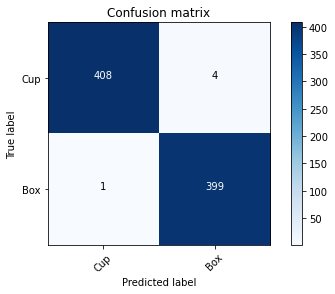

In [44]:
cm_plot_labels = ['Cup', 'Box']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title='Confusion matrix')

# Plotting

In [46]:
test_data = (test_img, test_labels)

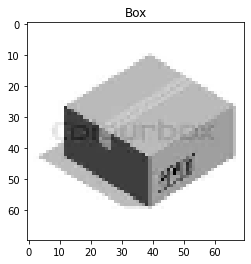

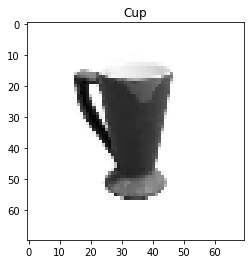

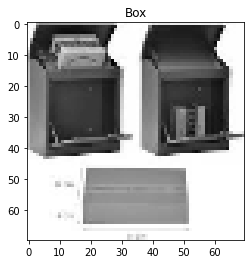

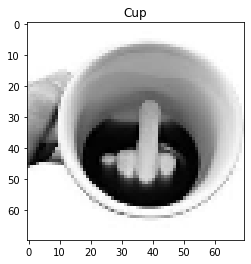

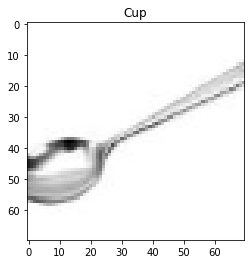

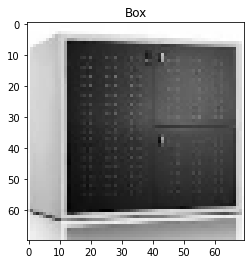

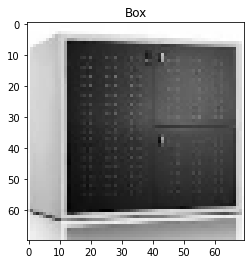

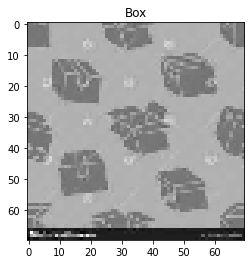

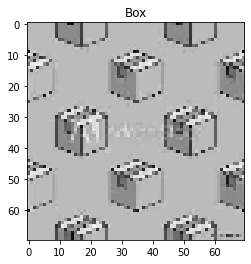

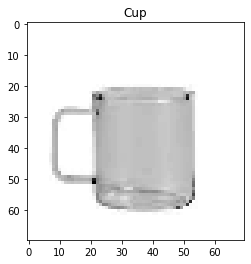

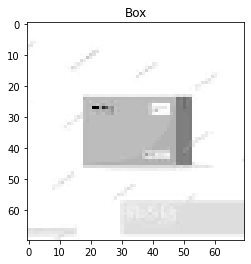

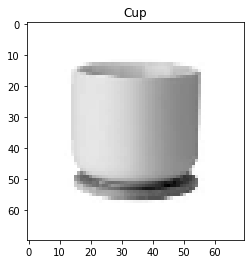

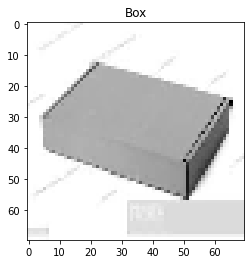

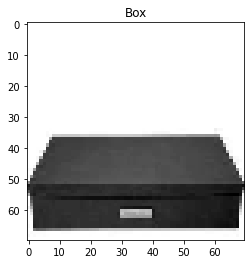

In [81]:
import cv2
import tensorflow as tf
from matplotlib.pyplot import show, imshow, title

IMG_SIZE = 70

def prepare(new_array):      
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

for i in range (0, 14):
    prediction = model.predict(prepare(test_img[i]))
    rounded_predictions = np.argmax(prediction, axis =-1)
    if rounded_predictions == 1:
        str_label = "Box"
    else:
        str_label = "Cup"
    imshow(test_img[i], cmap ='gray')
    title(str_label)
    show()

Text(0.5, 1.0, 'Cup')

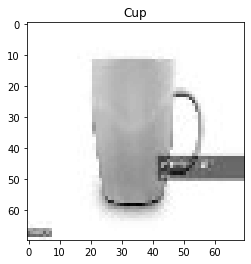

In [97]:
#For single image
import cv2
import tensorflow as tf

def prepare(filepath):
    IMG_SIZE = 70  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    imshow(img_array, cmap = 'gray')
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict(prepare("C:/Users/Yogesh/CupDetector/cup2.jpg"))
rounded_predictions = np.argmax(prediction, axis =-1)
#print(rounded_predictions)

if rounded_predictions == 1:
    str_label = "Box"
else:
    str_label = "Cup"
#imshow("C:/Users/Yogesh/CupDetector/cupCapture1.jpg", cmap ='gray')
title(str_label)

In [3]:
import numpy as np

import imutils
import cv2


cap = cv2.VideoCapture(0)
show = 1

while(True):
    # Capture frame-by-frame
    ret, image = cap.read()


    # load the image and convert it to grayscale
    #image = cv2.imread(args["image"])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the Scharr gradient magnitude representation of the images
    # in both the x and y direction using OpenCV 2.4
    ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
    gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)
    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)



    # blur and threshold the image
    blurred = cv2.blur(gradient, (9, 9))
    (_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

    # construct a closing kernel and apply it to the thresholded image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # perform a series of erosions and dilations
    closed = cv2.erode(closed, None, iterations = 4)
    closed = cv2.dilate(closed, None, iterations = 4)



    # find the contours in the thresholded image, then sort the contours
    # by their area, keeping only the largest one

    cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]

    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)

    # draw a bounding box arounded the detected barcode and display the
    # image

    cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
    cv2.imshow("Image", image)
    cv2.waitKey(25)



IndexError: list index out of range